In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Practice Case EDA 2

## Input Dataset from Database
Read data to perform Exploratory Data Analysis by input as 'datacredit' variable

In [3]:
datacredit=pd.read_csv('german_credit_data.csv')
print(datacredit)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
5             5   35    male    1    free             NaN              NaN   
6             6   53    male    2     own      quite rich              NaN   
7             7   35    male    3    rent          little         moderate   
8             8   61    male    1     own            rich              NaN   
9             9   28    male    3     own          little         moderate   
10           10   25  female    2    rent          little         moderate   
11           11   24  female    2    rent          little       

# Descriptive Attribute
Do some quick-look about data we're about to explore by run the dimension, data type, head/tail, summary statistics, etc 
to understand the data itself

In [4]:
datacredit.shape

(1000, 10)

In [6]:
print(type(datacredit))

<class 'pandas.core.frame.DataFrame'>


In [7]:
datacredit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [8]:
datacredit.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [9]:
print(datacredit.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [10]:
datacredit.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [11]:
datacredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [13]:
datacredit.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Missing Value Detection
Identifying any missing values in the data before perform any analysis. It's actually depend on the purpose of the performance, but if there is any missing values, we can cleanse and prepare it by not remove it from dataframe but doing imputation. If the missing values are numerical variable, we can impute it by its median, while if the missing values are categorical variable, we can impute it by its mode.

In [14]:
#to see missing values
datacredit.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
Unnamed: 0            0
dtype: int64

We can see from the total row of data 1000, the missing values is not too large.

Because 'Unnamed : 0' columns is just like an index it can't be analyze, we can drop it from dataframe

In [17]:
datacredit=datacredit.drop(['Unnamed: 0'],axis=1)
datacredit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Because the missing values are categorical variables, we can do imputation of missing values with Mode of its columns, because it is easier to find mode in categorical variable columns.

In [18]:
categorical=['Saving accounts', 'Checking account']

for mod in categorical:
    modus=datacredit[mod].mode().values[0]
    datacredit[mod]=datacredit[mod].fillna(modus)
    
datacredit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,little,little,9055,36,education
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,little,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [20]:
#checking that all the data have no missing values anymore
datacredit.isnull().sum().sort_values(ascending=False)

Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

In [21]:
datacredit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Finally, the data 'datacredit' is ready to perform any visualization we can desire depend on the purpose.

# Data Visualization : Univariate Analysis, Bivariate Analysis, Outlier Detection, and Correlation

# Outlier Detection
Outlier detection can be seen by visualize univariate analysis with some plot. <br>
At first, we need to split the data 'datacredit' into categorical data and numerical data.

In [27]:
#define numerical variables
numerical= ['Job','Credit amount', 'Duration','Age']
numerical = datacredit[numerical]
numerical.head()

,Job,Credit amount,Duration,Age
0,2,1169,6,67
1,2,5951,48,22
2,1,2096,12,49
3,2,7882,42,45
4,2,4870,24,53


In [28]:
#separate numerical variables from dataset, and the dataset will be categoric variable
categorical = datacredit.drop(numerical, axis = 1)
categorical.head()

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,little,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,little,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car


In [29]:
numerical.describe()

,Job,Credit amount,Duration,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.904000,3271.258000,20.903000,35.546000
std,0.653614,2822.736876,12.058814,11.375469
min,0.000000,250.000000,4.000000,19.000000
25%,2.000000,1365.500000,12.000000,27.000000
50%,2.000000,2319.500000,18.000000,33.000000
75%,2.000000,3972.250000,24.000000,42.000000
max,3.000000,18424.000000,72.000000,75.000000


In [30]:
categorical.describe()

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,1000,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,786,668,337


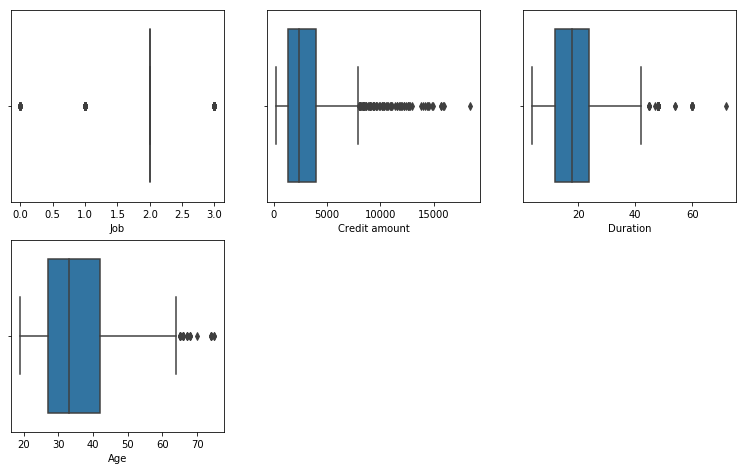

In [31]:
#define the distributin plot of each of numerical variables to see outlier
#determine the size of the figure plot
fig=plt.figure(figsize=(13,12))
axes=330
#using boxplot to visualize each numerical variables in one single loop 
for num in numerical:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=numerical, x=num)

plt.show()

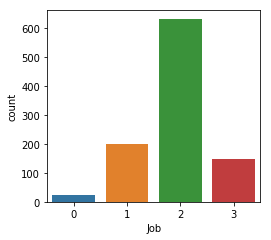

In [32]:
#If 'Job' variable on boxplot can not be seen clearly, it can be seen  by the countplot below
fig=plt.figure(figsize=(13,12))
fig.add_subplot(3,3,1)
sns.countplot(numerical['Job'])

From the result above it can be seen that there are some outlier in numerical data 'Credit amount', 'Duration', and 'Age'.<br>
All three have tendency to positive skew of normal curve with distribution of the data tends to go right. For modelling purposes, a different approach to outliers could be to try creating a transformation of the data, either transform the value or transform the variable, such as creating a percentile version of the original field, transform the variable to create normal distribution.<br>
On this case (EDA), we will not make any transformation to data outlier.

# Correlation

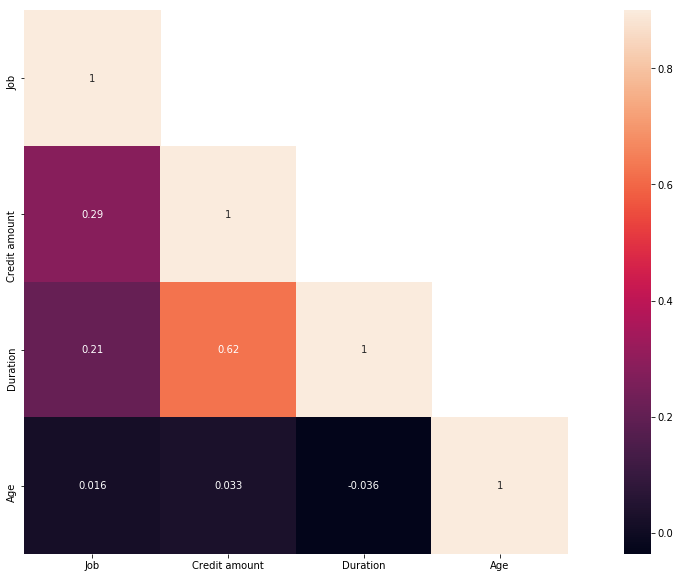

In [33]:
#create correlation with heatmap
corr = numerical.corr(method = 'pearson')
#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

From the result above, it can be seen that there are correlation between variables. Correlation between Duration and Credit Amount is 0.62, while Correlation between Job and Credit Amount is 0.29. So, it can be seen that the highest correlation is between Duration and Credit Amount. It has positive correlation.

# Perform any Visualization to Get Insight for Businesses

# 1. Scatter Plot : Relationship between 2 variables 'Credit Amount' and 'Duration'

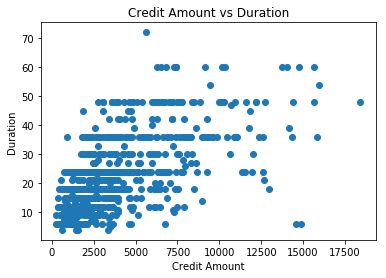

In [35]:
plt.scatter(numerical['Credit amount'],numerical['Duration'])
plt.title('Credit Amount vs Duration')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.show()

Scatter Plot above enhances the relationship between credit amount and duration

# Maaf mas ini belum selesai:(